In [28]:
import pandas as pd

In [29]:
import matplotlib.pyplot as plt

In [30]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.cluster import KMeans

import numpy as np
from sklearn import metrics

In [31]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)


In [32]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [34]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

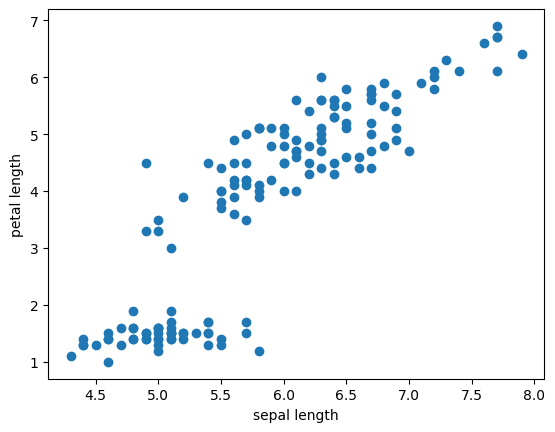

In [35]:
plt.scatter(X['sepal length (cm)'],X['petal length (cm)'])
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.show()

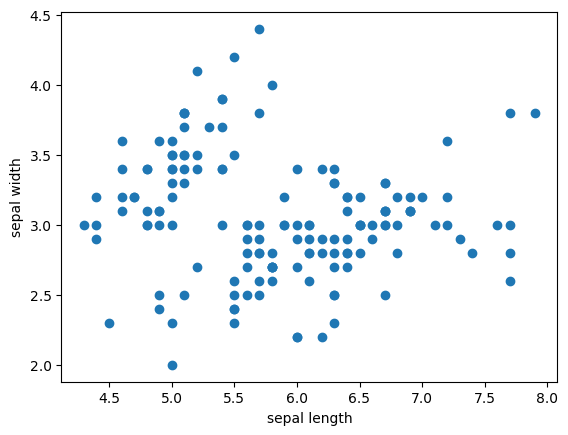

In [36]:
plt.scatter(X['sepal length (cm)'],X['sepal width (cm)'])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

In [62]:
revelent_cols = ['sepal length (cm)','petal length (cm)']
iris_df = X[revelent_cols]

In [63]:
iris_df

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
scaler.fit(iris_df)

StandardScaler()

In [67]:
scaled_data = scaler.transform(iris_df)

In [68]:
scaled_data

array([[-0.90068117, -1.34022653],
       [-1.14301691, -1.34022653],
       [-1.38535265, -1.39706395],
       [-1.50652052, -1.2833891 ],
       [-1.02184904, -1.34022653],
       [-0.53717756, -1.16971425],
       [-1.50652052, -1.34022653],
       [-1.02184904, -1.2833891 ],
       [-1.74885626, -1.34022653],
       [-1.14301691, -1.2833891 ],
       [-0.53717756, -1.2833891 ],
       [-1.26418478, -1.22655167],
       [-1.26418478, -1.34022653],
       [-1.87002413, -1.51073881],
       [-0.05250608, -1.45390138],
       [-0.17367395, -1.2833891 ],
       [-0.53717756, -1.39706395],
       [-0.90068117, -1.34022653],
       [-0.17367395, -1.16971425],
       [-0.90068117, -1.2833891 ],
       [-0.53717756, -1.16971425],
       [-0.90068117, -1.2833891 ],
       [-1.50652052, -1.56757623],
       [-0.90068117, -1.16971425],
       [-1.26418478, -1.05603939],
       [-1.02184904, -1.22655167],
       [-1.02184904, -1.22655167],
       [-0.7795133 , -1.2833891 ],
       [-0.7795133 ,

In [69]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
    return clusters_centers, k_values

In [70]:
clusters_centers,k_values = find_best_clusters(scaled_data, 50)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

In [71]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'blue')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.legend("blue = graph")
    plt.show()

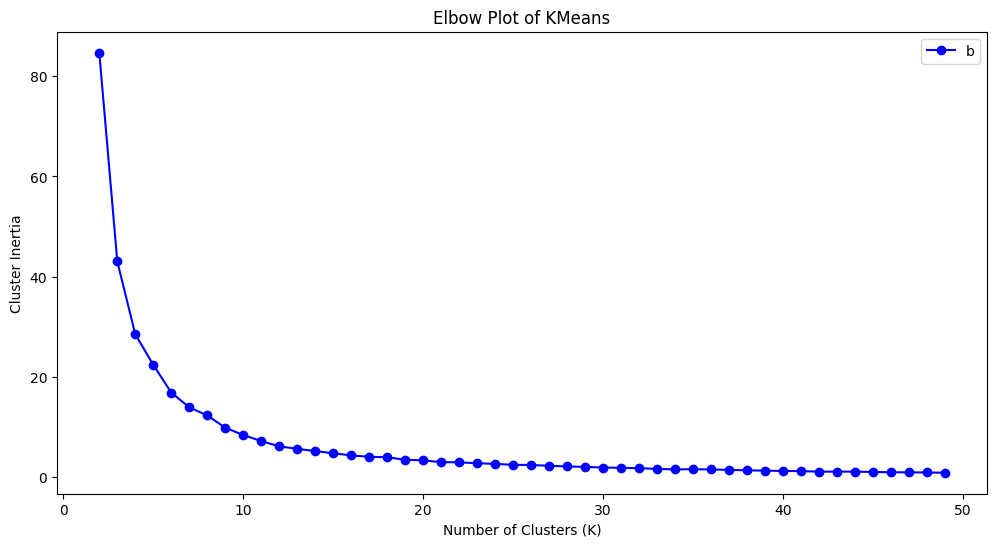

In [72]:
generate_elbow_plot(clusters_centers, k_values)

In [89]:
kmeans_model = KMeans(n_clusters = 3)

In [90]:
kmeans_model.fit(scaled_data)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [91]:
X["clusters"] = kmeans_model.labels_

In [92]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,2


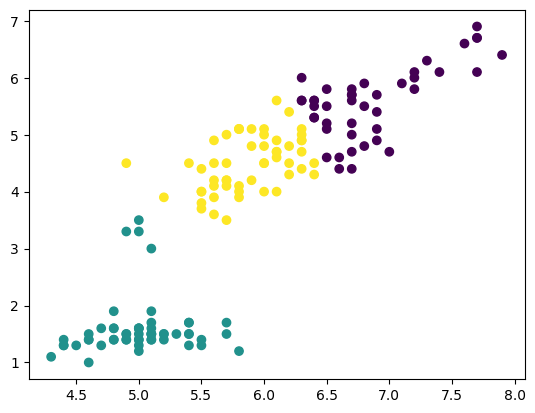

In [93]:
plt.scatter(X["sepal length (cm)"],
           X["petal length (cm)"],
           c = X["clusters"])
plt.show()